In [ ]:
!pip install opencv-python-headless numpy ezdxf
!pip install matplotlib ezdxf

DXF file saved to ./images/sample-logo.dxf


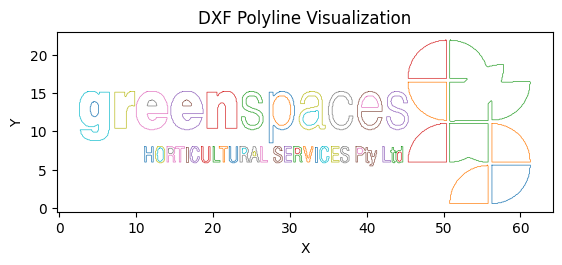

In [51]:
import cv2
import numpy as np
import ezdxf
import matplotlib.pyplot as plt

def plot_dxf(filename):
    # Load the DXF file
    doc = ezdxf.readfile(filename)
    modelspace = doc.modelspace()

    # Create a plot
    fig, ax = plt.subplots()

    # Loop over each entity in the modelspace
    for entity in modelspace:
        if entity.dxftype() == 'LWPOLYLINE':
            points = entity.get_points()
            x_coords = [p[0] for p in points]
            y_coords = [p[1] for p in points]
            # Plot the polyline
            ax.plot(x_coords, y_coords, linewidth=0.5)

    # Set axis labels and aspect ratio
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_aspect('equal')
    plt.title("DXF Polyline Visualization")
    plt.show()

# Load the image with transparency
image_path = './images/sample-logo.png'
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# Check if the image has transparency (alpha channel)
if image.shape[2] == 4:
    # Separate the alpha channel (transparency)
    _, _, _, alpha = cv2.split(image)
    # Threshold the alpha channel to get binary image (1 for opaque, 0 for transparent)
    _, binary_image = cv2.threshold(alpha, 0, 255, cv2.THRESH_BINARY)
else:
    # If no alpha channel, just convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours using RETR_TREE to capture inner and outer contours
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Create a new DXF file
dxf_doc = ezdxf.new(dxfversion='R2010')
modelspace = dxf_doc.modelspace()

# Scale factor to fit the logo in reasonable dimensions (adjust based on image size)
scale_factor = 0.1

# Get the height of the image to invert the y-coordinates (OpenCV's origin is top-left)
image_height = image.shape[0]

# Loop through all contours and add them as polylines in DXF
for i, contour in enumerate(contours):
    # Get contour points and invert the y-coordinates to match DXF coordinate system
    points = [(point[0][0] * scale_factor, (image_height - point[0][1]) * scale_factor) for point in contour]
    
    # Manually close the polyline by adding the first point to the end if necessary
    if points[0] != points[-1]:
        points.append(points[0])
    
    # Create the polyline
    polyline = modelspace.add_lwpolyline(points)

# Save the DXF file
dxf_output_path = './images/sample-logo.dxf'
dxf_doc.saveas(dxf_output_path)

print(f"DXF file saved to {dxf_output_path}")

plot_dxf(dxf_output_path)

